In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

We'll start by looking at some of the nice combinatorial graphs and their related matrices and properties.

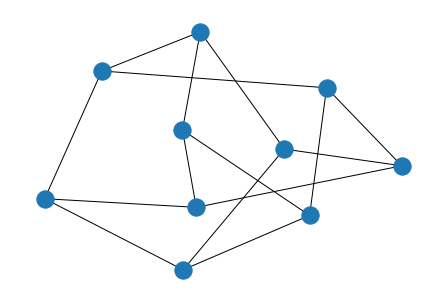

In [2]:
nx.draw(nx.petersen_graph())

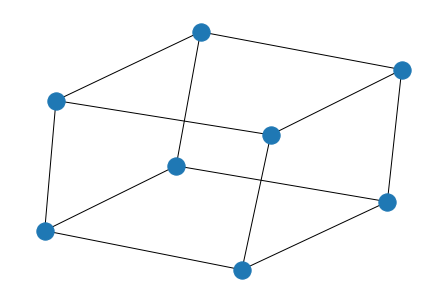

In [3]:
nx.draw(nx.hypercube_graph(3))

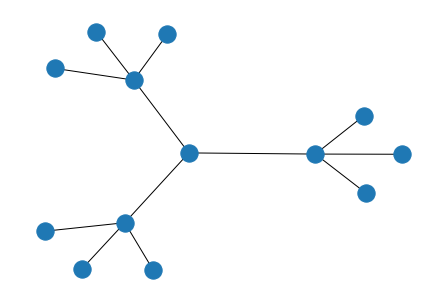

In [4]:
nx.draw(nx.balanced_tree(3,2))

Next is the toy example from the slides.

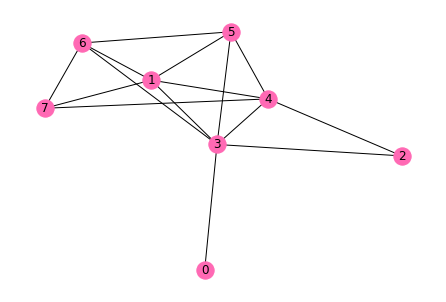

In [5]:
toy = nx.Graph()

toy.add_nodes_from([0,1,2,3,4,5,6,7])

toy.add_edges_from([(0,3),(1,3),(1,4),(1,5),(1,6),(1,7),(2,3),(2,4),(3,4),(3,5),(3,6),(4,5),(4,7),(5,6),(6,7)])

nx.draw(toy,with_labels='true',node_color='hotpink')

Here are the associated matrices for the toy graph. 

In [6]:
nx.adjacency_matrix(toy).todense()


matrix([[0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
        [0, 1, 0, 0, 1, 0, 1, 0]], dtype=int32)

In [7]:
nx.laplacian_matrix(toy).todense()


matrix([[ 1,  0,  0, -1,  0,  0,  0,  0],
        [ 0,  5,  0, -1, -1, -1, -1, -1],
        [ 0,  0,  2, -1, -1,  0,  0,  0],
        [-1, -1, -1,  6, -1, -1, -1,  0],
        [ 0, -1, -1, -1,  5, -1,  0, -1],
        [ 0, -1,  0, -1, -1,  4, -1,  0],
        [ 0, -1,  0, -1,  0, -1,  4, -1],
        [ 0, -1,  0,  0, -1,  0, -1,  3]], dtype=int32)

One of our first results was that the entries in A^k count the walks of length k between each pair of nodes. Below we can see that node 2 (remember the nodes are 0-indexed) lies on one triangle (2-3-4) and that there are three walks of length 3 from 0 to 1: 

* 0-3-4-1
* 0-3-5-1
* 0-3-6-1

In [8]:
(nx.adjacency_matrix(toy).todense())**3


matrix([[ 0,  3,  1,  6,  3,  3,  2,  3],
        [ 3, 14,  6, 17, 15, 14, 13, 11],
        [ 1,  6,  2,  9,  8,  5,  6,  4],
        [ 6, 17,  9, 12, 16, 14, 15,  8],
        [ 3, 15,  8, 16, 10, 15,  9, 12],
        [ 3, 14,  5, 14, 15, 10, 13,  7],
        [ 2, 13,  6, 15,  9, 13,  8, 11],
        [ 3, 11,  4,  8, 12,  7, 11,  4]], dtype=int32)

When we plot the spectrum of the adjacency matrix we see both positive and negative eigenvalues but we can verify that the leading eigenvalue lies between the minimum and maximum degrees (1 < 3.75 <  lambda_1 < 6) and that there is a positive Perron-Frobenius eigenvector corresponding to the lambda_1. 

The toy example has distinct eigenvalues, so the diameter is definitely smaller than this but if we look at the hypercube graph we see that the inequality is tight. 

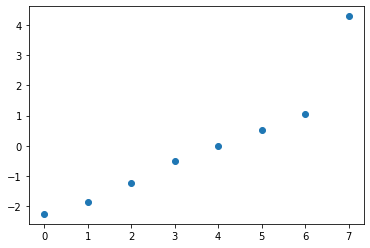

In [9]:
plt.plot(np.linalg.eigh((nx.adjacency_matrix(toy).todense()))[0],'o')

In [10]:
print(np.linalg.eigh((nx.adjacency_matrix(toy).todense()))[0][-1])

print(toy.degree())



4.283441959591185
[(0, 1), (1, 5), (2, 2), (3, 6), (4, 5), (5, 4), (6, 4), (7, 3)]


In [11]:
nx.diameter(toy)

3

In [12]:
np.linalg.eigh((nx.adjacency_matrix(toy).todense()))[1][:,-1]


matrix([[-0.10523895],
        [-0.44697278],
        [-0.2022497 ],
        [-0.45078492],
        [-0.41553994],
        [-0.39258638],
        [-0.36832331],
        [-0.28734743]])

4


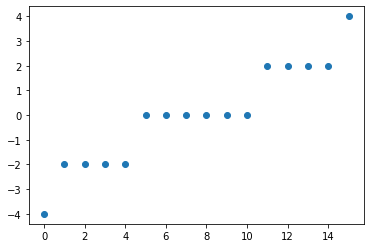

In [13]:
plt.plot(np.linalg.eigh((nx.adjacency_matrix(nx.hypercube_graph(4)).todense()))[0],'o')
print(nx.diameter(nx.hypercube_graph(4)))

When we switch over to the Laplacian we see that the spectrum is non-negative and that the all ones vector is indeed an eigenvector corresponding to 0. Up to rounding, we also can check that Kirchoff's tree theorem works for our graph. 

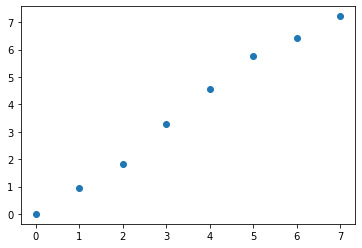

In [14]:
plt.plot(np.linalg.eigh((nx.laplacian_matrix(toy).todense()))[0],'o')

In [15]:
np.dot(nx.laplacian_matrix(toy).todense(),np.ones((8,1)))

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [16]:
(1/8)*np.product([x for x in np.linalg.eigh((nx.laplacian_matrix(toy).todense()))[0] if x>.00000001])

870.9999999999998

In [17]:
np.linalg.det(nx.laplacian_matrix(toy).todense()[1:,1:])

871.0000000000001

If you look back up at the leading eigenvector of the toy graph, you'll see that the values correspond to the eigenvector centrality solution returned by networkx. 

In [18]:
nx.eigenvector_centrality(toy)


{0: 0.10523952900167408,
 1: 0.44697237459165906,
 2: 0.20225051723904325,
 3: 0.450785524704978,
 4: 0.41554018813441973,
 5: 0.39258629245208454,
 6: 0.3683227782581993,
 7: 0.28734676424225714}

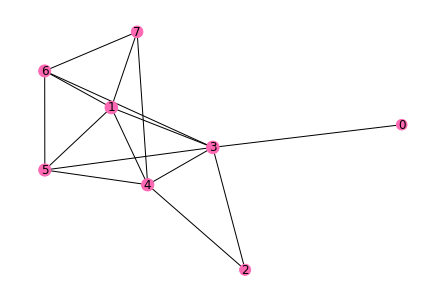

In [19]:
nx.draw(toy,with_labels='true',node_color='hotpink',node_size = [100*math.exp(nx.eigenvector_centrality(toy)[x]) for x in toy.nodes()])